# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = weather_api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key +"&q="

#Cities weather data frame
cities_df = pd.DataFrame({"City":cities})
cities_df["Country"] = ""
cities_df["Temperature"] =""
cities_df["Humidity"] =""
cities_df["Cloudiness"] =""
cities_df["Windspeed"] =""
cities_df["Latitude"]=""
cities_df["Longitude"]=""
cities_df.head()
print("Beginning Data Retrieval")
print("------------------------")

for index, row in cities_df.iterrows():
    city =row["City"]
    response = requests.get(url+city)
    city_weather = response.json()
    print(f"Processing Record {index} | {city}")
    city_weather_url =response.url
    print(response.url)

    
    try:
        cities_df.loc[index,"Country"]=city_weather['sys']['country']
        cities_df.loc[index,"Temperature"]=city_weather['main']['temp']
        cities_df.loc[index,"Humidity"]=city_weather['main']['humidity']
        cities_df.loc[index,"Cloudiness"]=city_weather['clouds']['all']
        cities_df.loc[index,"Windspeed"]=city_weather['wind']['speed']
        cities_df.loc[index,"Latitude"]=city_weather['coord']['lat']
        cities_df.loc[index,"Longitude"]=city_weather["coord"]['lon']
        
    except (KeyError, IndexError):
        print(f"City not found... skipping.")

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 0 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=bambous%20virieux
Processing Record 1 | howard springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=howard%20springs
Processing Record 2 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=port%20alfred
Processing Record 3 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=iqaluit
Processing Record 4 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=busselton
Processing Record 5 | middletown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=middletown
Processing Record 6 | sergeyevka
http://api.openwe

Processing Record 55 | yumen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=yumen
Processing Record 56 | sobolevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=sobolevo
Processing Record 57 | port blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=port%20blair
Processing Record 58 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=fortuna
Processing Record 59 | phan thiet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=phan%20thiet
Processing Record 60 | coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=coquimbo
Processing Record 61 | kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=

Processing Record 110 | tonj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=tonj
Processing Record 111 | kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=kamenka
Processing Record 112 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=mar%20del%20plata
Processing Record 113 | nome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=nome
Processing Record 114 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=lavrentiya
Processing Record 115 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=hobart
Processing Record 116 | gejiu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=g

Processing Record 165 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=butaritari
Processing Record 166 | sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=sola
Processing Record 167 | hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=hasaki
Processing Record 168 | shatalovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=shatalovo
Processing Record 169 | luanda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=luanda
Processing Record 170 | santiago del estero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=santiago%20del%20estero
Processing Record 171 | jinka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c8

Processing Record 221 | durazno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=durazno
Processing Record 222 | grand river south east
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=grand%20river%20south%20east
City not found... skipping.
Processing Record 223 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=victoria
Processing Record 224 | sao jose da coroa grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=sao%20jose%20da%20coroa%20grande
Processing Record 225 | kijang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=kijang
Processing Record 226 | parrita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=parrita
Processing Record 227 | astara
http:

Processing Record 278 | aanekoski
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=aanekoski
Processing Record 279 | petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=petropavlovsk-kamchatskiy
Processing Record 280 | nauta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=nauta
Processing Record 281 | birobidzhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=birobidzhan
Processing Record 282 | crab hill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=crab%20hill
City not found... skipping.
Processing Record 283 | placerville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=placerville
Processing Record 284 | mtwara
http://api.openweathermap

Processing Record 333 | fagersta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=fagersta
Processing Record 334 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=umzimvubu
City not found... skipping.
Processing Record 335 | tilichiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=tilichiki
Processing Record 336 | tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=tautira
Processing Record 337 | kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=kavaratti
Processing Record 338 | pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=pisco
Processing Record 339 | bacolod
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cde

Processing Record 391 | bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=bonavista
Processing Record 392 | urengoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=urengoy
Processing Record 393 | whitehorse
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=whitehorse
Processing Record 394 | cumberland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=cumberland
Processing Record 395 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=bethel
Processing Record 396 | makung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=makung
City not found... skipping.
Processing Record 397 | qingyuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9

Processing Record 447 | haines junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=haines%20junction
Processing Record 448 | almaznyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=almaznyy
Processing Record 449 | calama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=calama
Processing Record 450 | ocampo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=ocampo
Processing Record 451 | washim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=washim
Processing Record 452 | jiexiu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=jiexiu
Processing Record 453 | grao mogol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c

Processing Record 505 | canmore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=canmore
Processing Record 506 | ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=ancud
Processing Record 507 | martapura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=martapura
Processing Record 508 | kilindoni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=kilindoni
Processing Record 509 | kuching
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=kuching
Processing Record 510 | simbahan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=simbahan
Processing Record 511 | abramovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q

Processing Record 561 | agadir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=agadir
Processing Record 562 | ngunguru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=ngunguru
Processing Record 563 | rio cuarto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=rio%20cuarto
Processing Record 564 | bougouni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=bougouni
Processing Record 565 | ukiah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=ukiah
Processing Record 566 | lubao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=lubao
Processing Record 567 | la romana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=la%

Processing Record 617 | amapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=amapa
Processing Record 618 | bolungarvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=bolungarvik
City not found... skipping.
Processing Record 619 | olonets
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=olonets
Processing Record 620 | khonuu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=khonuu
City not found... skipping.
Processing Record 621 | nizhniy tsasuchey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=nizhniy%20tsasuchey
Processing Record 622 | ahumada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=ahumada
City not found... skipping.
Processing Record 623 | belonia
ht

In [4]:
print(cities_df)

                City Country Temperature Humidity Cloudiness Windspeed  \
0    bambous virieux      MU       79.05       69         40     14.97   
1     howard springs      AU       81.55       67        100      3.53   
2        port alfred      ZA       63.18       95        100      1.99   
3            iqaluit      CA         0.7       77         20         0   
4          busselton      AU       64.54       51          4     11.16   
..               ...     ...         ...      ...        ...       ...   
626          xai-xai      MZ       78.28       68          3      6.78   
627         sabzevar      IR       83.48       20         40     16.11   
628              vao      NC       74.89       75         79     20.31   
629         umm jarr                                                     
630      xiaoweizhai      CN        66.7       96         39      3.04   

    Latitude Longitude  
0   -20.3428   57.7575  
1    -12.497   131.047  
2   -33.5906    26.891  
3    63.750

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_df.dropna(axis=0, inplace=True)

cities_df.to_csv('city_data_output.csv')
cities_df.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude
0,bambous virieux,MU,79.05,69,40,14.97,-20.3428,57.7575
1,howard springs,AU,81.55,67,100,3.53,-12.497,131.047
2,port alfred,ZA,63.18,95,100,1.99,-33.5906,26.891
3,iqaluit,CA,0.7,77,20,0,63.7506,-68.5145
4,busselton,AU,64.54,51,4,11.16,-33.65,115.3333


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
cities_df.dtypes


City           object
Country        object
Temperature    object
Humidity       object
Cloudiness     object
Windspeed      object
Latitude       object
Longitude      object
dtype: object

In [7]:
cities_df["Temperature"]=pd.to_numeric(cities_df["Temperature"])
cities_df["Humidity"]=pd.to_numeric(cities_df["Humidity"])
cities_df["Cloudiness"]=pd.to_numeric(cities_df["Cloudiness"])
cities_df["Windspeed"]=pd.to_numeric(cities_df["Windspeed"])
cities_df["Latitude"]=pd.to_numeric(cities_df["Latitude"])
cities_df["Longitude"]=pd.to_numeric(cities_df["Longitude"])
cities_df.dtypes

City            object
Country         object
Temperature    float64
Humidity       float64
Cloudiness     float64
Windspeed      float64
Latitude       float64
Longitude      float64
dtype: object

In [8]:
cities_df["Humidity"].max()

100.0

No Cities that have over 100% humidity


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
# Create Variables for plotting

lat=cities_df["Latitude"]
max_temp=cities_df["Temperature"]
humidity=cities_df["Humidity"]
cloudiness=cities_df["Cloudiness"]
windspeed=cities_df["Windspeed"]

## Latitude vs. Temperature Plot

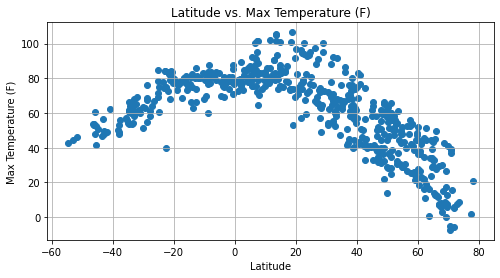

In [11]:
# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(lat,max_temp)

# Create Labels and Title
plt.title("Latitude vs. Max Temperature (F)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Display
plt.show()


## Latitude vs. Humidity Plot

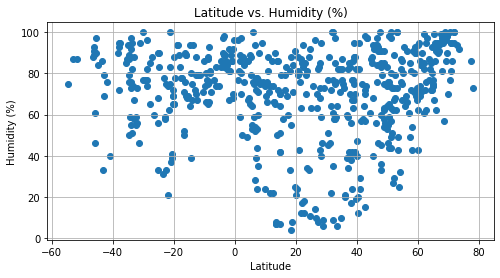

In [12]:
# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(lat,humidity)

# Create Labels and Title
plt.title("Latitude vs. Humidity (%)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Display
plt.show()

## Latitude vs. Cloudiness Plot

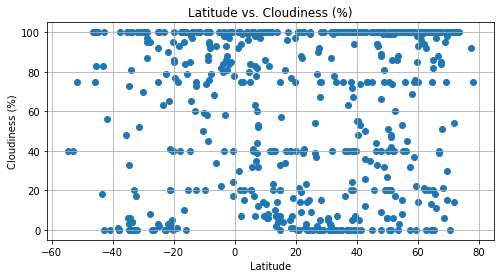

In [13]:
# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(lat,cloudiness)

# Create Labels and Title
plt.title("Latitude vs. Cloudiness (%)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Display
plt.show()

## Latitude vs. Wind Speed Plot

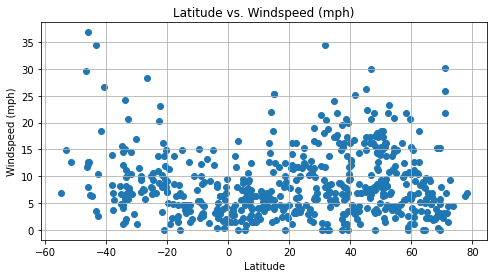

In [14]:
# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(lat,windspeed)

# Create Labels and Title
plt.title("Latitude vs. Windspeed (mph)")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.grid(True)

# Display
plt.show()

## Linear Regression

In [15]:
# Create Northern Hemisphere Dataframe
northern_df=cities_df.loc[cities_df["Latitude"]>=0]

northern_df.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude
3,iqaluit,CA,0.70,77.0,20.0,0.00,63.7506,-68.5145
5,middletown,US,61.16,70.0,0.0,9.22,39.5151,-84.3983
6,sergeyevka,KZ,44.24,25.0,3.0,11.43,53.8800,67.4158
7,santa cruz del sur,CU,74.61,79.0,100.0,14.07,20.7147,-77.9956
8,ketou,BJ,95.34,44.0,82.0,4.23,7.3633,2.5998


In [16]:
northern_df.dtypes

City            object
Country         object
Temperature    float64
Humidity       float64
Cloudiness     float64
Windspeed      float64
Latitude       float64
Longitude      float64
dtype: object

In [17]:
# Create Southern Hemisphere Dataframe
southern_df=cities_df.loc[cities_df["Latitude"]<0]

southern_df.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude
0,bambous virieux,MU,79.05,69.0,40.0,14.97,-20.3428,57.7575
1,howard springs,AU,81.55,67.0,100.0,3.53,-12.4970,131.0470
2,port alfred,ZA,63.18,95.0,100.0,1.99,-33.5906,26.8910
4,busselton,AU,64.54,51.0,4.0,11.16,-33.6500,115.3333
9,cuamba,MZ,80.87,64.0,85.0,6.31,-14.8031,36.5372


In [18]:
southern_df.dtypes

City            object
Country         object
Temperature    float64
Humidity       float64
Cloudiness     float64
Windspeed      float64
Latitude       float64
Longitude      float64
dtype: object

In [19]:
# Create Variables for plotting
north_lat=northern_df["Latitude"]
north_max_temp=northern_df["Temperature"]
north_humidity=northern_df["Humidity"]
north_cloudiness=northern_df["Cloudiness"]
north_windspeed=northern_df["Windspeed"]

south_lat=southern_df["Latitude"]
south_max_temp=southern_df["Temperature"]
south_humidity=southern_df["Humidity"]
south_cloudiness=southern_df["Cloudiness"]
south_windspeed=southern_df["Windspeed"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

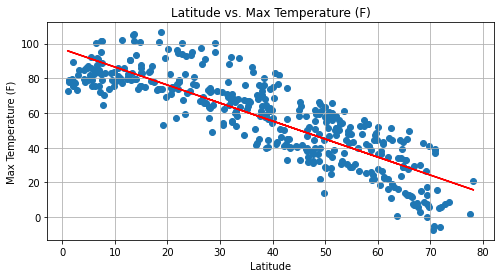

Regression line equation is: y = -1.04x + 96.89
The r-squared is: -0.8538250630168723


In [20]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_max_temp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(north_lat,north_max_temp)
plt.plot(north_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Max Temperature (F)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

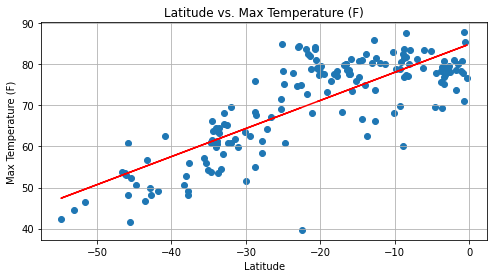

Regression line equation is: y = 0.68x + 84.86
The r-squared is: 0.8023480208696262


In [21]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_max_temp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(south_lat,south_max_temp)
plt.plot(south_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Max Temperature (F)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

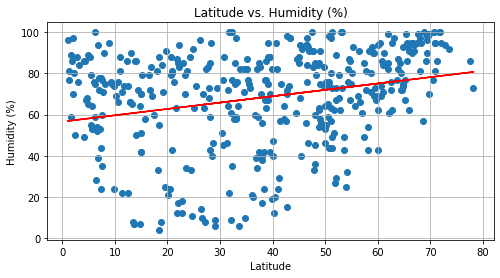

Regression line equation is: y = 0.31x + 56.58
The r-squared is: 0.26484630323493163


In [22]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_humidity)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(north_lat,north_humidity)
plt.plot(north_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Humidity (%)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

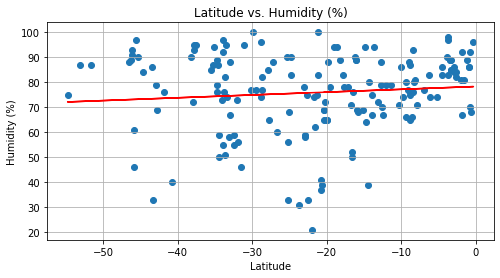

Regression line equation is: y = 0.11x + 78.31
The r-squared is: 0.09716516156151114


In [23]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_humidity)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(south_lat,south_humidity)
plt.plot(south_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Humidity (%)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

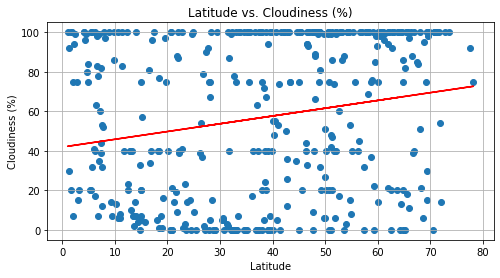

Regression line equation is: y = 0.39x + 41.91
The r-squared is: 0.20337324905250345


In [24]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloudiness)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(north_lat,north_cloudiness)
plt.plot(north_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Cloudiness (%)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

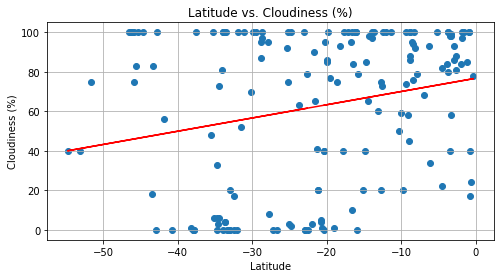

Regression line equation is: y = 0.67x + 76.73
The r-squared is: 0.23701035885672814


In [25]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloudiness)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(south_lat,south_cloudiness)
plt.plot(south_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Cloudiness (%)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

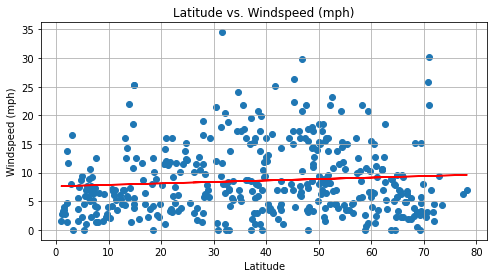

Regression line equation is: y = 0.03x + 7.62
The r-squared is: 0.08511887554075077


In [26]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_windspeed)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(north_lat,north_windspeed)
plt.plot(north_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Windspeed (mph)")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

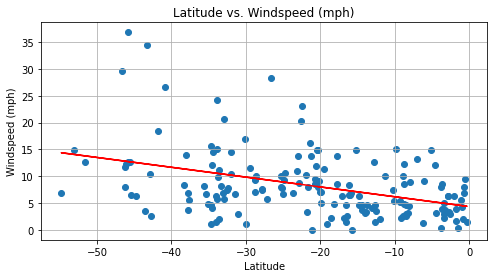

Regression line equation is: y = -0.18x + 4.34
The r-squared is: -0.40585558030558205


In [27]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_windspeed)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(south_lat,south_windspeed)
plt.plot(south_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Windspeed (mph)")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")